# Exploratory Data Analysis

This file gives descriptive statistics and overall distributions in the data. 

EDA specifically related to the waveforms are found on Signal_EDA. 

Data has already been cleansed and processed by load_data.PreProcessing()


### Dependencies

In [1]:
from dotenv import load_dotenv
import sys
import warnings

from __init__ import get_base_path
import data.load_data as load_data

import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

load_dotenv()
warnings.filterwarnings('ignore')

In [2]:
random_seed = int(os.getenv('RANDOM_SEED'))
random_seed

42

### Read & Describe Dataframe

In [3]:
# csv_file = load_data.combined_csv
csv_file = load_data.combined_sample_csv

df = load_data.load_from_csv(csv_file)

pd.set_option('display.max_columns', df.shape[1])
pd.set_option('display.max_rows', df.shape[0])

(25944, 232)


### Dtypes, Nulls, Numeric Attributes

In [4]:
print(df.shape)
print(df.info(memory_usage=True))

(25944, 232)
<class 'pandas.core.frame.DataFrame'>
Index: 25944 entries, 0 to 78262
Columns: 232 entries, R1_voltage_AC_phase_A_angle to R4_Phase_C_pos_neg_zero_avg_power
dtypes: category(1), datetime64[ns](1), float64(216), int64(10), object(4)
memory usage: 45.9+ MB
None


In [5]:
pd.concat({'dtypes':df.dtypes, 
           'count_null':df.isnull().sum(), 
           'describe':df.select_dtypes('number').describe().round(2).T},axis=1)

dtypes count_null describe  \
                                                        0          1    count   
R1_voltage_AC_phase_A_angle                       float64          0  25944.0   
R1_voltage_AC_phase_A_magnitude                   float64          0  25944.0   
R1_voltage_AC_phase_B_angle                       float64          0  25944.0   
R1_voltage_AC_phase_B_magnitude                   float64          0  25944.0   
R1_voltage_AC_phase_C_angle                       float64          0  25944.0   
R1_voltage_AC_phase_C_magnitude                   float64          0  25944.0   
R1_current_AC_phase_A_angle                       float64          0  25944.0   
R1_current_AC_phase_A_magnitude                   float64          0  25944.0   
R1_current_AC_phase_B_angle                       float64          0  25944.0   
R1_current_AC_phase_B_magnitude                   float64          0  25944.0   
R1_current_AC_phase_C_angle                       float64          0  25944.0   
R1_current_AC_phase_C_magnitude                   float64          0  25944.0   
R1_pos_neg_zero_voltage_phase_A_angle             float64          0  25944.0   
R1_pos_neg_zero_voltage_phase_A_magnitude         float64          0  25944.0   
R1_pos_neg_zero_voltage_phase_B_angle             float64          0  25944.0   
R1_pos_neg_zero_voltage_phase_B_magnitude         float64          0  25944.0   
R1_pos_neg_zero_voltage_phase_C_angle             float64          0  25944.0   
R1_pos_neg_zero_voltage_phase_C_magnitude         float64          0  25944.0   
R1_pos_neg_zero_current_phase_A_angle             float64          0  25944.0   
R1_pos_neg_zero_current_phase_A_magnitude         float64          0  25944.0   
R1_pos_neg_zero_current_phase_B_angle             float64          0  25944.0   
R1_pos_neg_zero_current_phase_B_magnitude         float64          0  25944.0   
R1_pos_neg_zero_current_phase_C_angle             float64          0  25944.0   
R1_pos_neg_zero_current_phase_C_magnitude         float64          0  25944.0   
R1_frequency_for_relays                           float64          0  25944.0   
R1_frequency_delta_dFdt_for_relays                float64          0  25944.0   
R1_appearance_impedance_for_relays                float64          0  25944.0   
R1_appearance_impedance_angle_for_relays            int64          0  25944.0   
R1_status_flag_for_relays                           int64          0  25944.0   
R2_voltage_AC_phase_A_angle                       float64          0  25944.0   
R2_voltage_AC_phase_A_magnitude                   float64          0  25944.0   
R2_voltage_AC_phase_B_angle                       float64          0  25944.0   
R2_voltage_AC_phase_B_magnitude                   float64          0  25944.0   
R2_voltage_AC_phase_C_angle                       float64          0  25944.0   
R2_voltage_AC_phase_C_magnitude                   float64          0  25944.0   
R2_current_AC_phase_A_angle                       float64          0  25944.0   
R2_current_AC_phase_A_magnitude                   float64          0  25944.0   
R2_current_AC_phase_B_angle                       float64          0  25944.0   
R2_current_AC_phase_B_magnitude                   float64          0  25944.0   
R2_current_AC_phase_C_angle                       float64          0  25944.0   
R2_current_AC_phase_C_magnitude                   float64          0  25944.0   
R2_pos_neg_zero_voltage_phase_A_angle             float64          0  25944.0   
R2_pos_neg_zero_voltage_phase_A_magnitude         float64          0  25944.0   
R2_pos_neg_zero_voltage_phase_B_angle             float64          0  25944.0   
R2_pos_neg_zero_voltage_phase_B_magnitude         float64          0  25944.0   
R2_pos_neg_zero_voltage_phase_C_angle             float64          0  25944.0   
R2_pos_neg_zero_voltage_phase_C_magnitude         float64          0  25944.0   
R2_pos_neg_zero_current_phase_A_angle             float64          0  25944.0   
R

### Class Attributes

Frequencies and unique values

In [6]:
df.select_dtypes(['object','boolean','category']).describe().T

,count,unique,top,freq
marker,25944,37,6,1885
scenario_type,25944,36,L1 maintenance with R1 and R2 disabled,1922
scenario_class,25944,3,attack,19076
scenario_broad_type,25944,7,attack fault,11645
is_attack,25944,2,attack,19076


In [7]:
for i in df.select_dtypes(['object','boolean','category']):
    print(i, df[i].unique())

marker [41, 39, 35, 28, 27, ..., 16, 8, 3, 13, 14]
Length: 37
Categories (37, int64): [1, 2, 3, 4, ..., 38, 39, 40, 41]
scenario_type ['normal operation load changes' 'L1 maintenance with R1 and R2 disabled'
 'Fault from 10-49% on L1 with R1 and R2 disabled & fault'
 'Fault from 50-90% on L2 with R3 disabled & fault'
 'Fault from 20-90% on L2 with R3 disabled & fault'
 'Fault from 10-19% on L2 with R3 disabled & fault'
 'Fault from 20-90% on L1 with R1 disabled & fault'
 'Command injection to R1 and R2' 'Command Injection to R4'
 'Command Injection to R1'
 'Faultfrom 80-90% on L2 with data injection tripping command'
 'Fault from 10-19% on L1 with data injection tripping command'
 'Fault from 80-90% on L2' 'Fault from 10-19% on L2'
 'Fault from 50-90% on L1 with R1 and R2 disabled & fault'
 'Command injection to R3 and R4'
 'Fault from 20-79% on L2 with data injection tripping command'
 'Fault from 20-79% on L2' 'Fault from 20-79% on L1'
 'Fault from 10-19% on L1'
 'Fault from 50-90% o

In [8]:
df['sample_id'].nunique()

184

# Data Visualization

### Class Distributions

Using matplotlib backend: module://matplotlib_inline.backend_inline


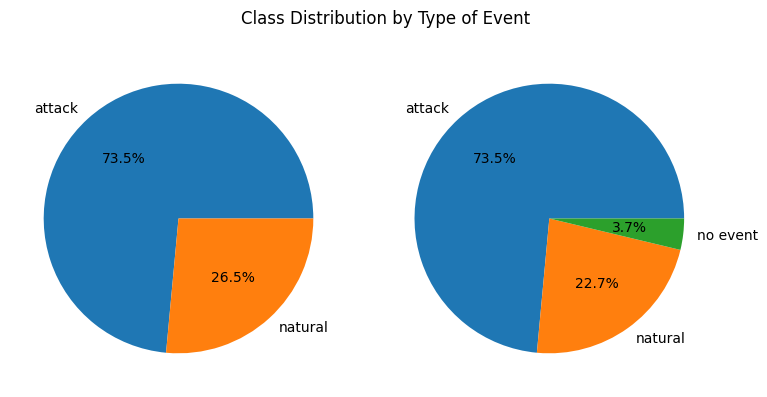

In [10]:
%matplotlib
# evidently most of the classes are attacks, followed by normal anomalies. the smallest class is normal baseline
binary_class_counts = df['is_attack'].value_counts()
tertiary_class_counts = df['scenario_class'].value_counts()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
fig.suptitle("Class Distribution by Type of Event")
ax1.pie(binary_class_counts, labels=['attack','natural'], autopct='%1.1f%%')
ax2.pie(tertiary_class_counts, labels=tertiary_class_counts.index, autopct='%1.1f%%')
plt.tight_layout()
plt.show()

Using matplotlib backend: module://matplotlib_inline.backend_inline


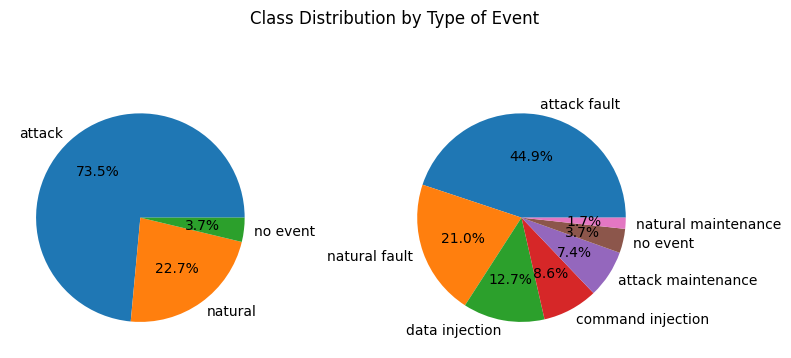

In [11]:
%matplotlib
# evidently most of the classes are attacks, followed by normal anomalies. the smallest class is normal baseline
tertiary_class_counts = df['scenario_class'].value_counts()
broad_class_counts = df['scenario_broad_type'].value_counts()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
fig.suptitle("Class Distribution by Type of Event")
ax1.pie(tertiary_class_counts, labels=tertiary_class_counts.index, autopct='%1.1f%%')
ax2.pie(broad_class_counts, labels=broad_class_counts.index, autopct='%1.1f%%')
plt.tight_layout()
plt.show()

Using matplotlib backend: module://matplotlib_inline.backend_inline


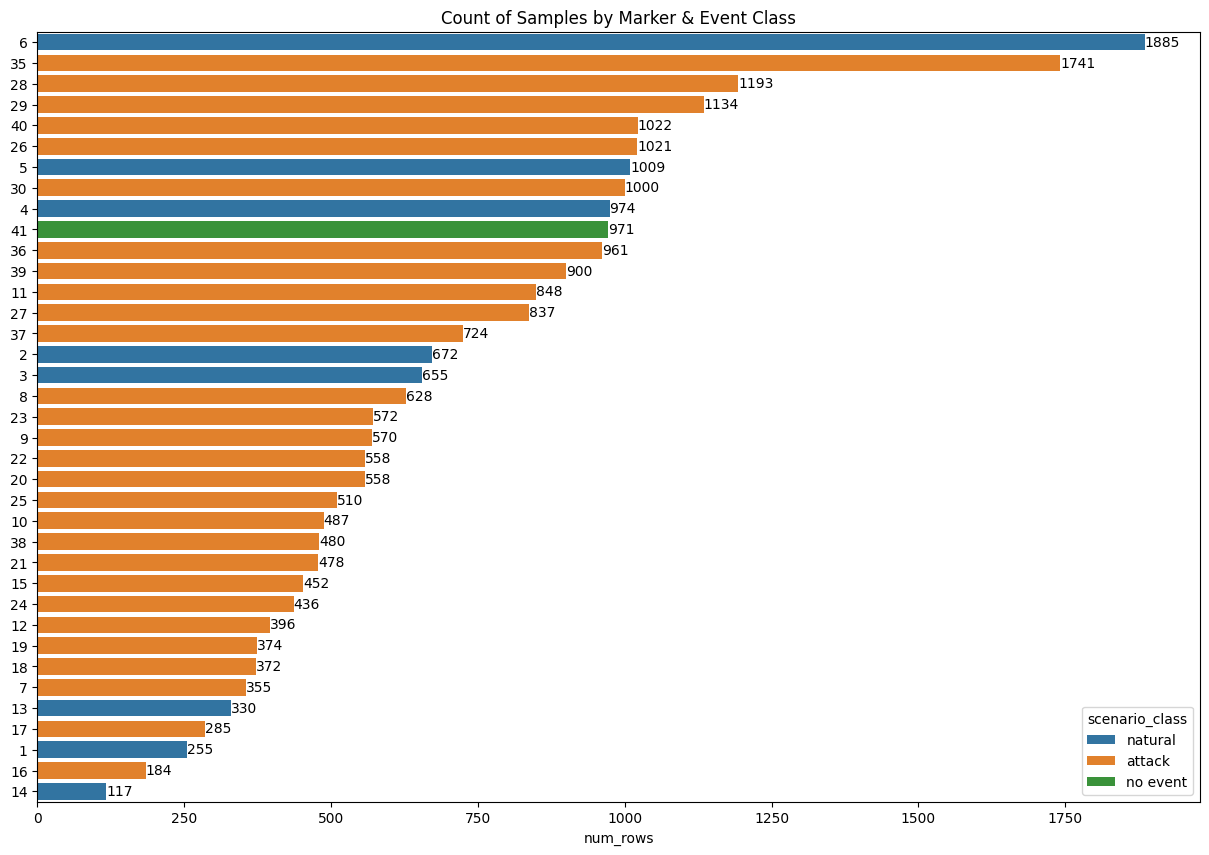

In [12]:
%matplotlib

# get marker class sizes
class_counts = df.loc[:,['scenario_class','marker','snort_log1']].groupby(['scenario_class','marker']).count()
class_counts.columns = ['num_rows']
filt = class_counts['num_rows'] != 0
class_counts = class_counts.loc[filt,:].sort_values(by='num_rows',ascending=False)

# visualize overall class sizes by row count
plt.figure(figsize=(15,10))

g = sns.barplot(x=class_counts['num_rows'], y=[str(i) for i in class_counts.index.get_level_values(1).to_list()], hue=class_counts.index.get_level_values(0))
for i in g.containers:
    g.bar_label(i)

plt.title('Count of Samples by Marker & Event Class')
plt.show()

### Cross Correlation

In [13]:
numeric_df = df.loc[:,df.select_dtypes('number').columns]
corr = numeric_df.corr()
for col in corr.columns:
    print(col,'\n', corr[col].sort_values(ascending=False)[1:10],'\n')

R1_voltage_AC_phase_A_angle 
 R1_pos_neg_zero_voltage_phase_A_angle    0.999512
R4_pos_neg_zero_voltage_phase_A_angle    0.956322
R4_voltage_AC_phase_A_angle              0.956286
R1_pos_neg_zero_current_phase_A_angle    0.910155
R1_current_AC_phase_A_angle              0.900561
R4_pos_neg_zero_current_phase_A_angle    0.895522
R4_current_AC_phase_A_angle              0.886128
R2_voltage_AC_phase_A_angle              0.860972
R2_pos_neg_zero_voltage_phase_A_angle    0.860944
Name: R1_voltage_AC_phase_A_angle, dtype: float64 

R1_voltage_AC_phase_A_magnitude 
 R1_pos_neg_zero_voltage_phase_A_magnitude    0.986870
R1_voltage_AC_phase_C_magnitude              0.976772
R1_voltage_AC_phase_B_magnitude              0.976211
R4_voltage_AC_phase_A_magnitude              0.631127
R4_pos_neg_zero_voltage_phase_A_magnitude    0.627308
R4_voltage_AC_phase_C_magnitude              0.624288
R4_voltage_AC_phase_B_magnitude              0.623653
R2_voltage_AC_phase_A_magnitude              0.303203
R2

# Current Distplot

Raw magnitudes from synchrophasors 

In [15]:
mag_df = df.loc[:,[i for i in df.columns if 'magnitude' in i.lower()] + ['is_attack','scenario_class','scenario_broad_type']]
scaled_cols = mag_df.select_dtypes('number')
mag_df[scaled_cols.columns] = scaled_cols.apply(lambda x: np.log(x+1), axis=1)
mag_df.head()


,R1_voltage_AC_phase_A_magnitude,R1_voltage_AC_phase_B_magnitude,R1_voltage_AC_phase_C_magnitude,R1_current_AC_phase_A_magnitude,R1_current_AC_phase_B_magnitude,R1_current_AC_phase_C_magnitude,R1_pos_neg_zero_voltage_phase_A_magnitude,R1_pos_neg_zero_voltage_phase_B_magnitude,R1_pos_neg_zero_voltage_phase_C_magnitude,R1_pos_neg_zero_current_phase_A_magnitude,R1_pos_neg_zero_current_phase_B_magnitude,R1_pos_neg_zero_current_phase_C_magnitude,R2_voltage_AC_phase_A_magnitude,R2_voltage_AC_phase_B_magnitude,R2_voltage_AC_phase_C_magnitude,R2_current_AC_phase_A_magnitude,R2_current_AC_phase_B_magnitude,R2_current_AC_phase_C_magnitude,R2_pos_neg_zero_voltage_phase_A_magnitude,R2_pos_neg_zero_voltage_phase_B_magnitude,R2_pos_neg_zero_voltage_phase_C_magnitude,R2_pos_neg_zero_current_phase_A_magnitude,R2_pos_neg_zero_current_phase_B_magnitude,R2_pos_neg_zero_current_phase_C_magnitude,R3_voltage_AC_phase_A_magnitude,R3_voltage_AC_phase_B_magnitude,R3_voltage_AC_phase_C_magnitude,R3_current_AC_phase_A_magnitude,R3_current_AC_phase_B_magnitude,R3_current_AC_phase_C_magnitude,R3_pos_neg_zero_voltage_phase_A_magnitude,R3_pos_neg_zero_voltage_phase_B_magnitude,R3_pos_neg_zero_voltage_phase_C_magnitude,R3_pos_neg_zero_current_phase_A_magnitude,R3_pos_neg_zero_current_phase_B_magnitude,R3_pos_neg_zero_current_phase_C_magnitude,R4_voltage_AC_phase_A_magnitude,R4_voltage_AC_phase_B_magnitude,R4_voltage_AC_phase_C_magnitude,R4_current_AC_phase_A_magnitude,R4_current_AC_phase_B_magnitude,R4_current_AC_phase_C_magnitude,R4_pos_neg_zero_voltage_phase_A_magnitude,R4_pos_neg_zero_voltage_phase_B_magnitude,R4_pos_neg_zero_voltage_phase_C_magnitude,R4_pos_neg_zero_current_phase_A_magnitude,R4_pos_neg_zero_current_phase_B_magnitude,R4_pos_neg_zero_current_phase_C_magnitude,is_attack,scenario_class,scenario_broad_type
0,2.546099,2.546083,2.546129,2.002612,2.007166,2.001836,2.546099,0.0,0.0,2.003868,1.295305,1.308997,2.544207,2.544114,2.544259,2.004134,2.008390,2.003549,2.544195,0.0,0.0,2.005336,1.287080,1.288338,2.543927,2.543911,2.543943,2.003545,2.007479,2.002816,2.543927,0.0,0.0,2.004591,1.272982,1.269028,2.546129,2.545744,2.546160,2.002286,2.006103,2.001260,2.546006,0.0,0.0,2.003181,1.276865,1.265002,not attack,no event,no event
1,2.547682,2.547667,2.547727,1.971760,1.976658,1.971127,2.547697,0.0,0.0,1.973120,1.239174,1.256722,2.546469,2.546376,2.546516,1.973403,1.977966,1.972831,2.546453,0.0,0.0,1.974708,1.243546,1.243825,2.546191,2.546176,2.546206,1.972756,1.976961,1.971971,2.546191,0.0,0.0,1.973898,1.229856,1.225049,2.547712,2.547335,2.547742,1.971233,1.975286,1.970065,2.547592,0.0,0.0,1.972180,1.229856,1.215119,not attack,no event,no event
2,2.547697,2.547682,2.547742,1.971760,1.976658,1.971022,2.547712,0.0,0.0,1.973120,1.239174,1.256722,2.546473,2.546387,2.546533,1.973271,1.977905,1.972914,2.546464,0.0,0.0,1.974673,1.233535,1.242845,2.546191,2.546176,2.546222,1.972860,1.976961,1.971971,2.546191,0.0,0.0,1.973898,1.229856,1.215119,2.547727,2.547350,2.547742,1.971127,1.975388,1.970172,2.547607,0.0,0.0,1.972233,1.229856,1.225049,not attack,no event,no event
3,2.547863,2.547848,2.547908,1.971550,1.976152,1.971127,2.547863,0.0,0.0,1.972912,1.215119,1.234563,2.546657,2.546570,2.546710,1.973549,1.977548,1.972840,2.546645,0.0,0.0,1.974624,1.213681,1.216062,2.546375,2.546360,2.546391,1.972964,1.976607,1.972023,2.546375,0.0,0.0,1.973847,1.199367,1.193868,2.547893,2.547501,2.547923,1.971075,1.974928,1.970225,2.547773,0.0,0.0,1.972076,1.204738,1.199367,not attack,no event,no event
4,2.548163,2.548148,2.548208,1.972023,1.975745,1.972076,2.548178,0.0,0.0,1.973276,1.144525,1.182465,2.546974,2.546893,2.547028,1.973953,1.977074,1.973472,2.546964,0.0,0.0,1.974820,1.144518,1.145373,2.546712,2.546697,2.546712,1.973276,1.976152,1.972651,2.546712,0.0,0.0,1.974002,1.144525,1.130417,2.548193,2.547818,2.548222,1.971550,1.974466,1.971075,2.548073,0.0,0.0,1.972338,1.137574,1.130417,not attack,no event,no event


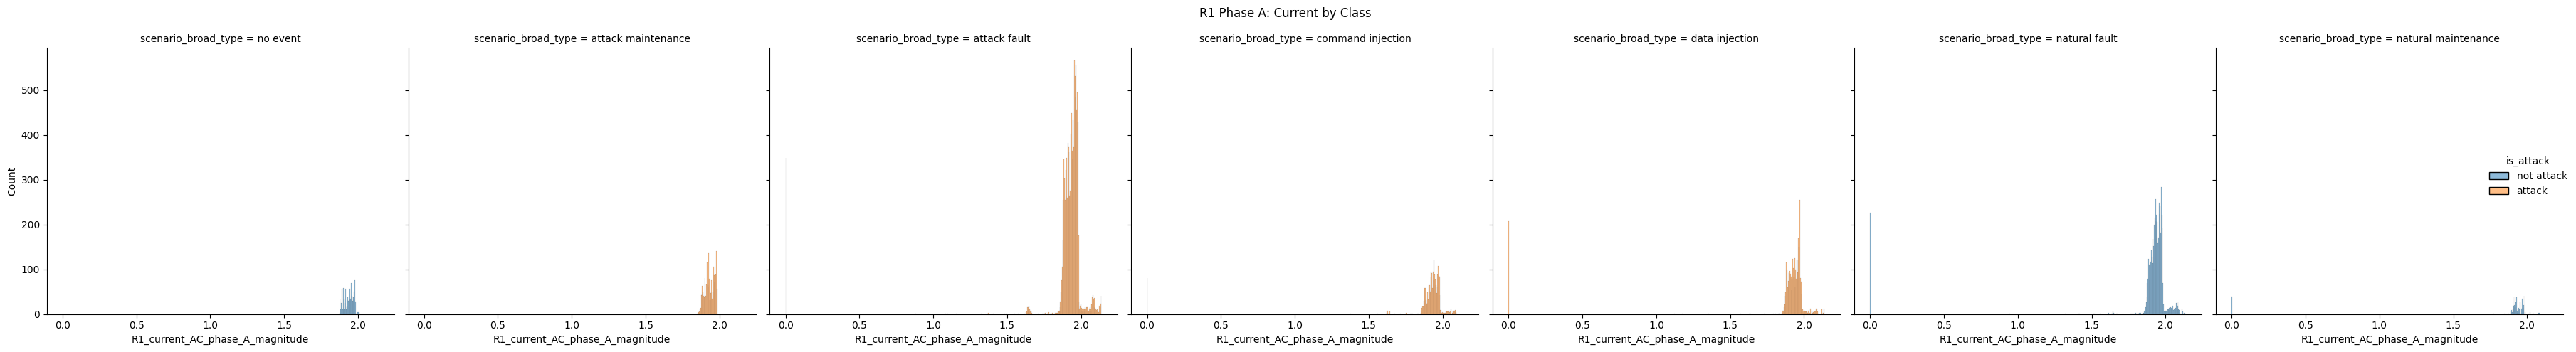

In [17]:
# plot amplitude by class
title = 'R1 Phase A: Current by Class'
g = sns.displot(mag_df, x='R1_current_AC_phase_A_magnitude', col='scenario_broad_type', hue='is_attack')
plt.suptitle(title)
plt.tight_layout()
plt.show()
